In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz

import statsmodels
import statsmodels.api as sm

import pydotplus
from IPython.display import Image
import graphviz

In [2]:
! pip install pydotplus

In [3]:
! pip install graphviz

In [4]:
plt.rcParams["figure.figsize"]=[15,8]

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

In [8]:
df_heart=pd.read_csv("5-HeartDisease.csv")

In [9]:
df_heart.shape

(303, 14)

In [10]:
df_heart.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [11]:
for col in ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']:
    
    df_heart[col]=df_heart[col].astype("object")

In [12]:
df_heart.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

In [13]:
df_features = df_heart.iloc[:, df_heart.columns != "target"]

df_target = df_heart.iloc[:, df_heart.columns == "target"]

In [14]:
# df_features.describe().T
df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
df_target.describe().T

,count,mean,std,min,25%,50%,75%,max
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [16]:
df_features.describe(include="object").T

,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


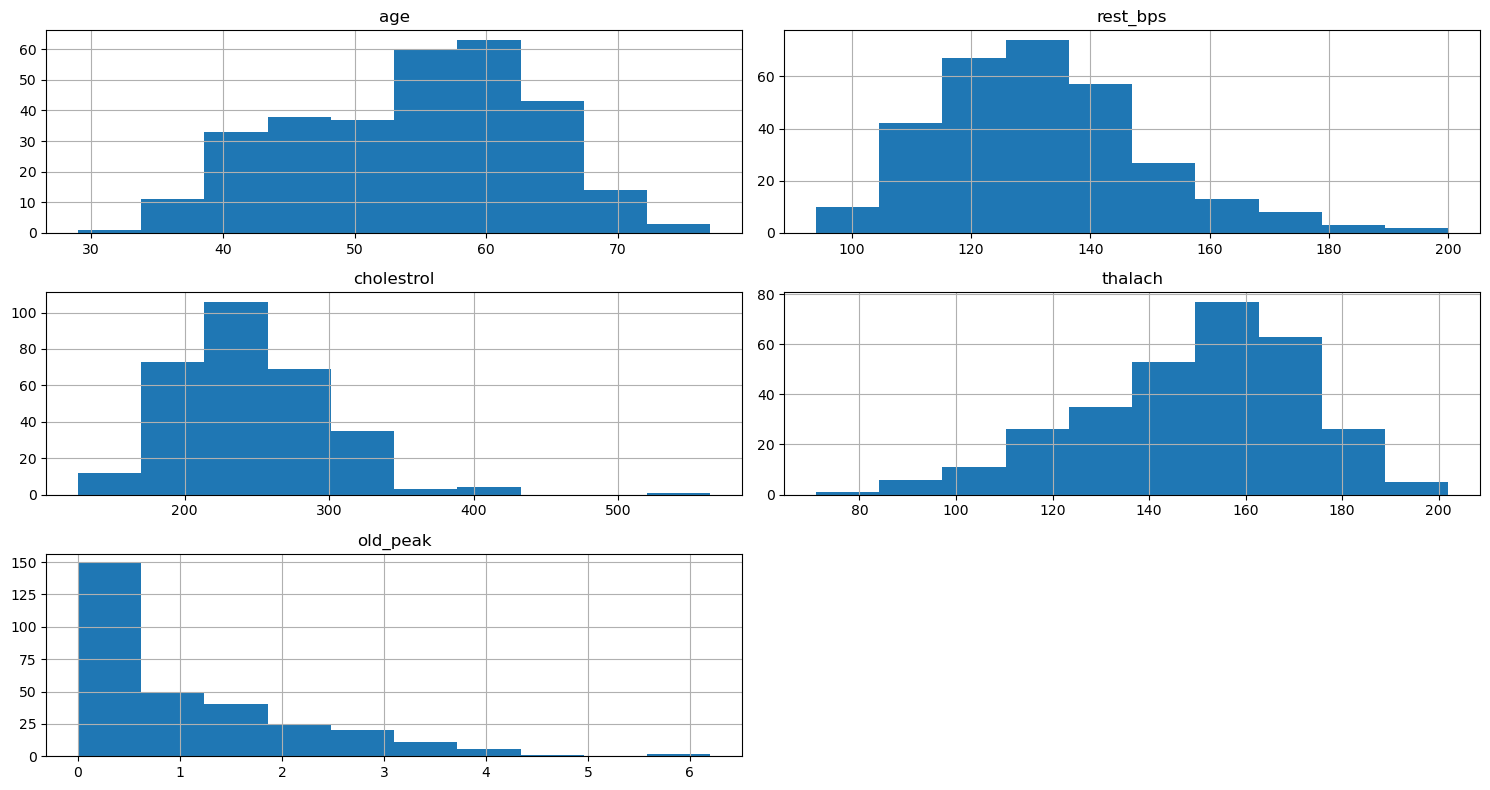

In [17]:
df_features.hist()

plt.tight_layout()

plt.show()

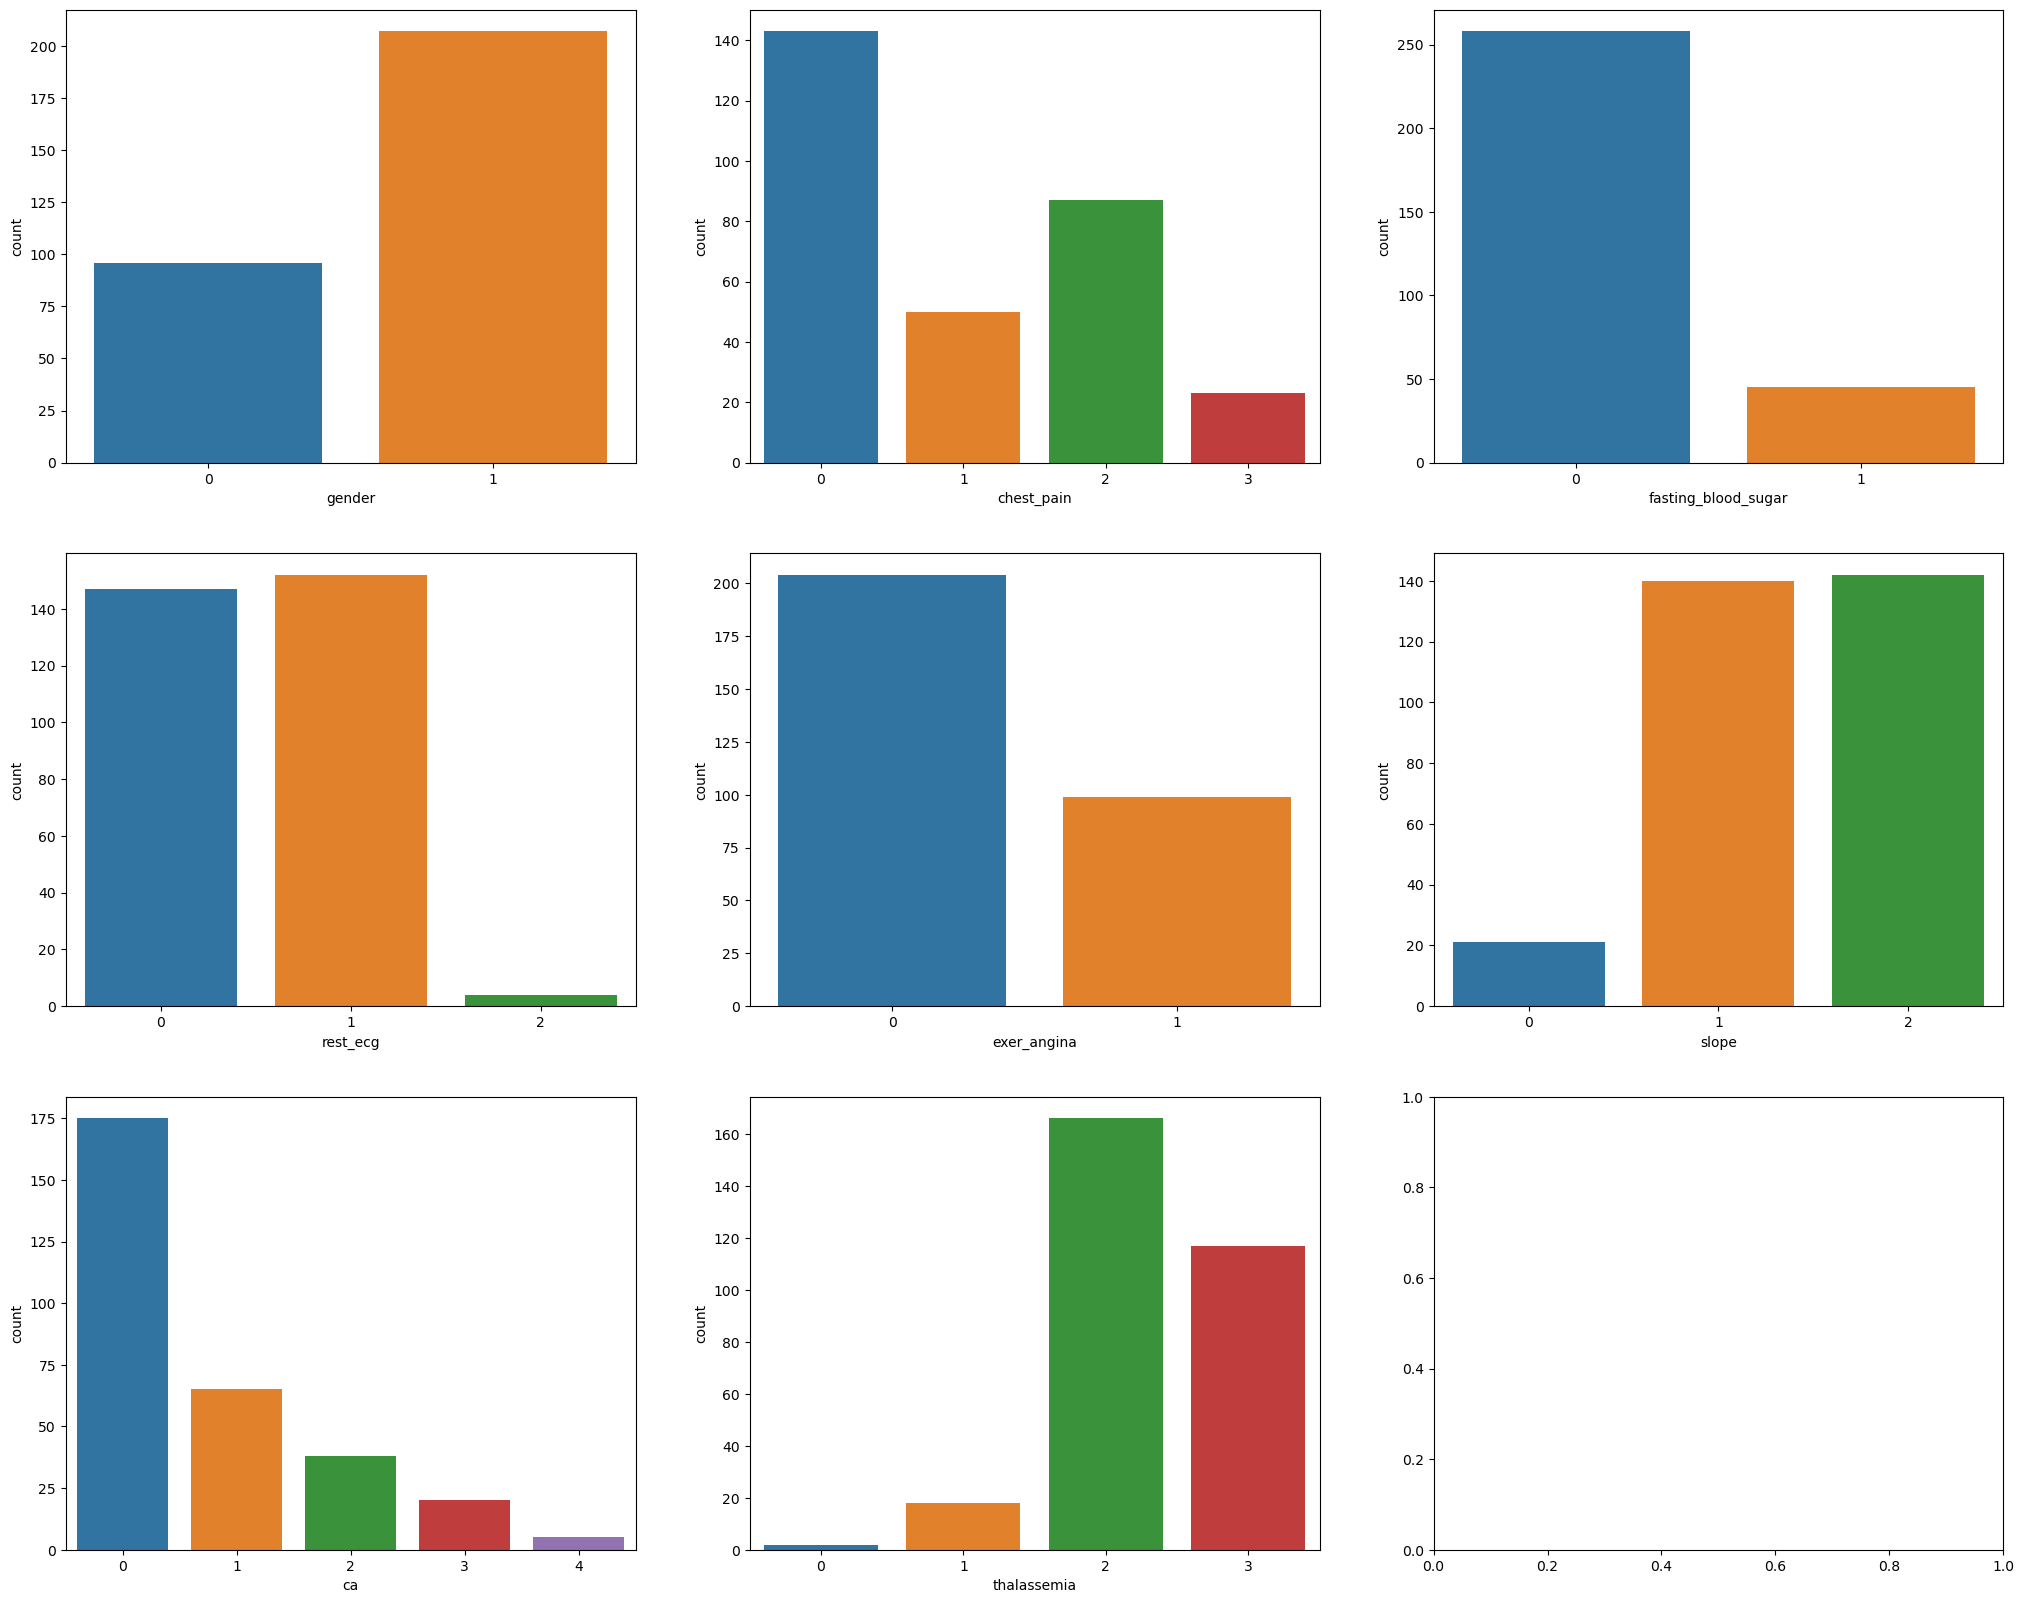

In [18]:
categorical=[]

for column in df_features:
    if df_features[column].dtype == 'object':
        categorical.append(column)
        
fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(25,20))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df_heart[variable], ax=subplot)
    
plt.show()

In [19]:
class_frequency = df_target.target.value_counts()
class_frequency

target
1    165
0    138
Name: count, dtype: int64

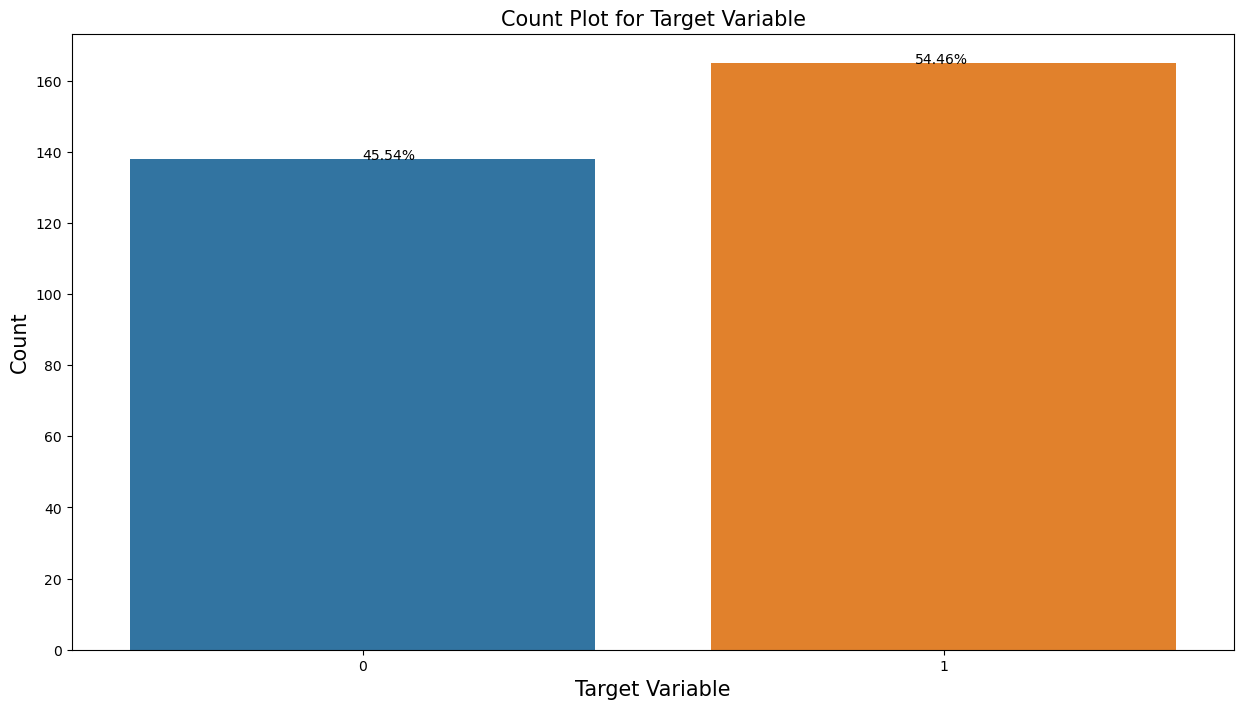

In [20]:
sns.countplot(x=df_target.target)

plt.text(x= 0, y=df_target.target.value_counts()[0],
        s=str(round((class_frequency[0])*100/len(df_target.target),2))+"%")
plt.text(x = 0.95, y = df_target.target.value_counts()[1],
         s = str(round((class_frequency[1])*100/len(df_target.target),2)) + '%')


plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [21]:
corr=df_features.corr(numeric_only=True)
corr

,age,rest_bps,cholestrol,thalach,old_peak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000


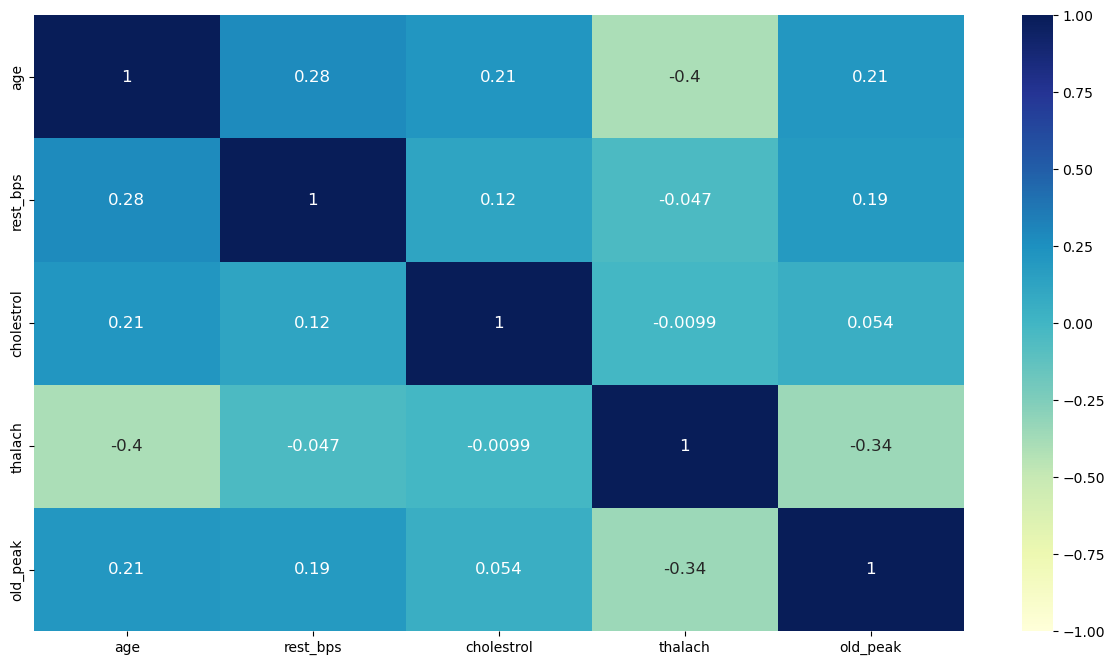

In [22]:
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12})

plt.show()

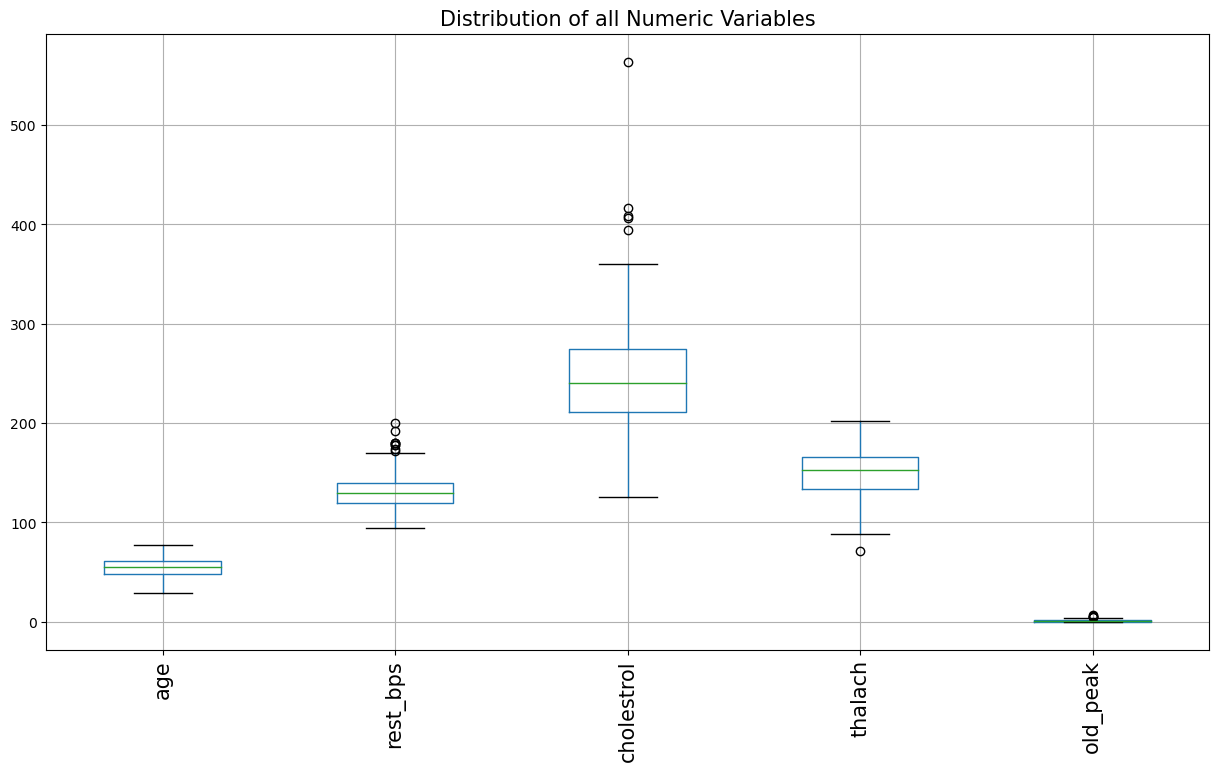

In [23]:
df_features.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

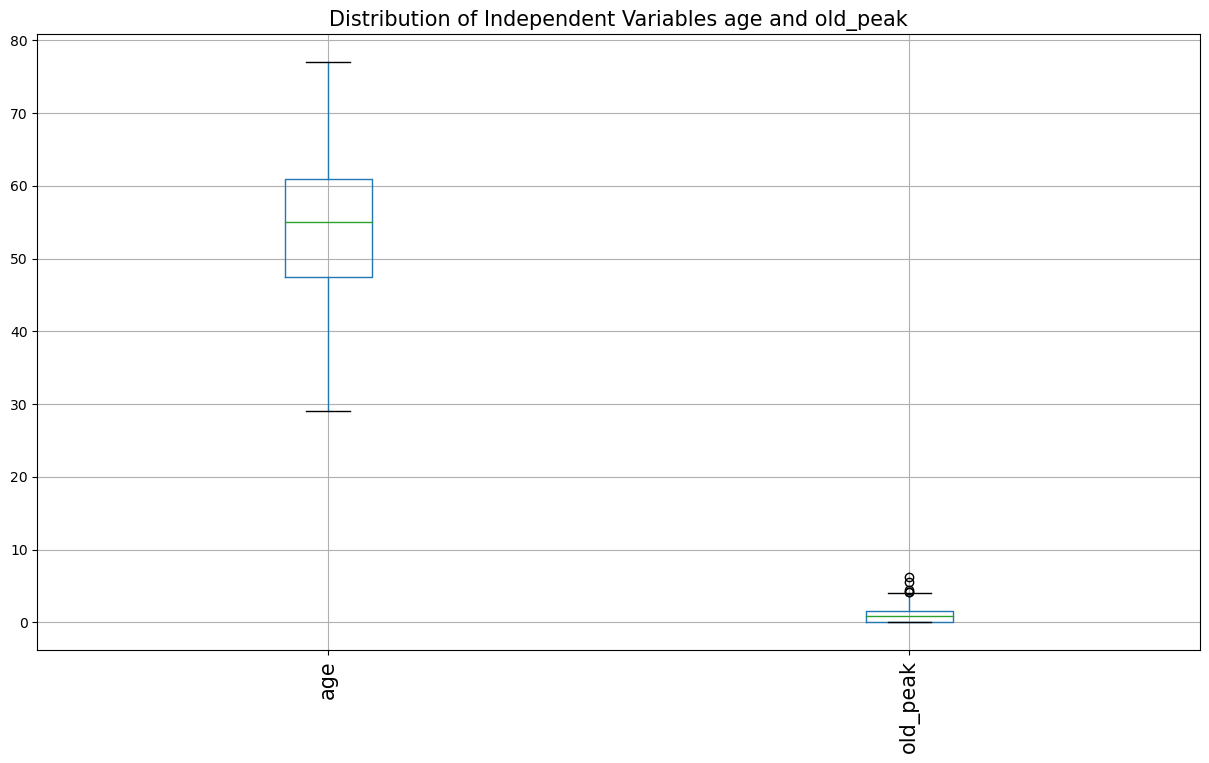

In [24]:
# make a list of numerical features 
cols = [ 'age','old_peak']

# plot multiple boxplots
df_features[cols].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables age and old_peak', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [25]:
# calculate the first quartile
Q1 = df_features.quantile(0.25)

# calculate the third quartile
Q3 = df_features.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age                    13.5
gender                  1.0
chest_pain              2.0
rest_bps               20.0
cholestrol             63.5
fasting_blood_sugar     0.0
rest_ecg                1.0
thalach                32.5
exer_angina             1.0
old_peak                1.6
slope                   1.0
ca                      1.0
thalassemia             1.0
dtype: object


In [26]:
# remove the outliers from the dataframe 'df_Heart'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_features = df_features[~((df_features < (Q1 - 1.5 * IQR)) | (df_features > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_features = df_features.reset_index(drop = True)

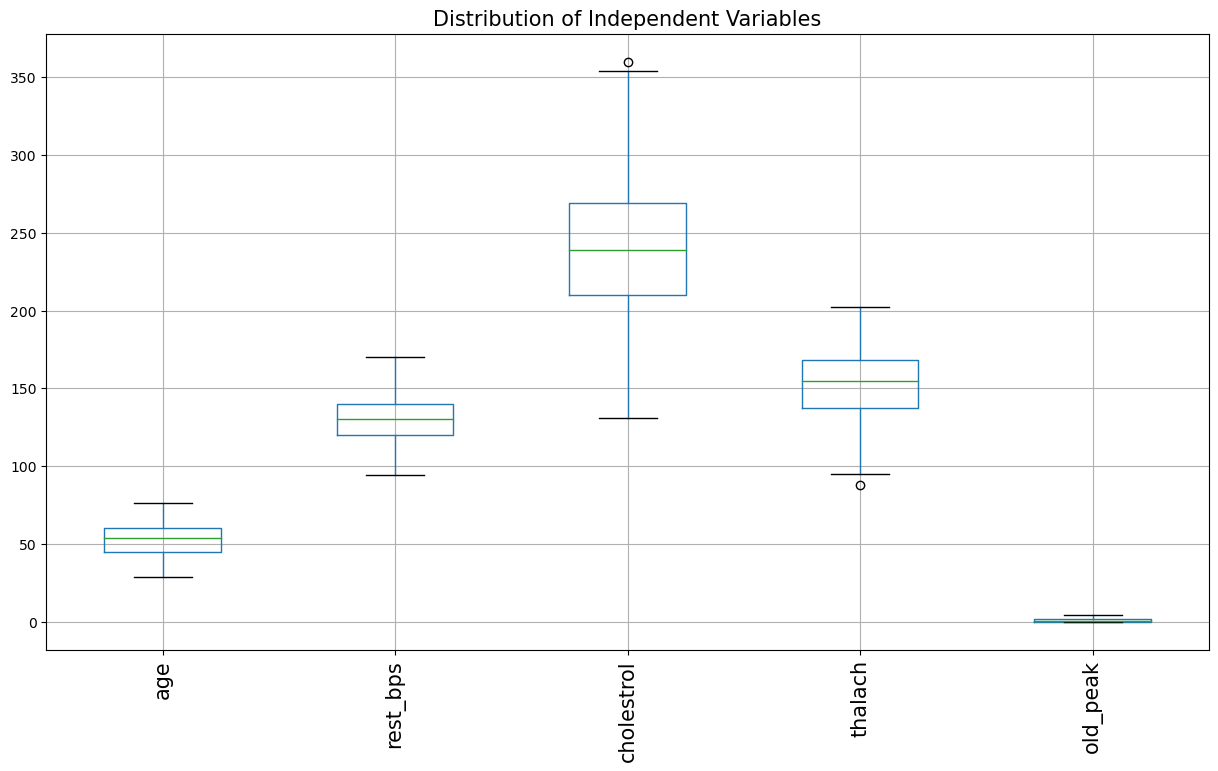

In [27]:
# make a list of numerical features without considering the 'white corpuscle'
cols = ['age','rest_bps','cholestrol','thalach','old_peak']

# plot multiple boxplots
df_features[cols].boxplot()


# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [28]:
df_features.shape

(228, 13)

In [29]:
df_heart.shape

(303, 14)

In [30]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_heart.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_heart.isnull().sum()*100/df_heart.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
age,0,0.0
gender,0,0.0
chest_pain,0,0.0
rest_bps,0,0.0
cholestrol,0,0.0
fasting_blood_sugar,0,0.0
rest_ecg,0,0.0
thalach,0,0.0
exer_angina,0,0.0
old_peak,0,0.0


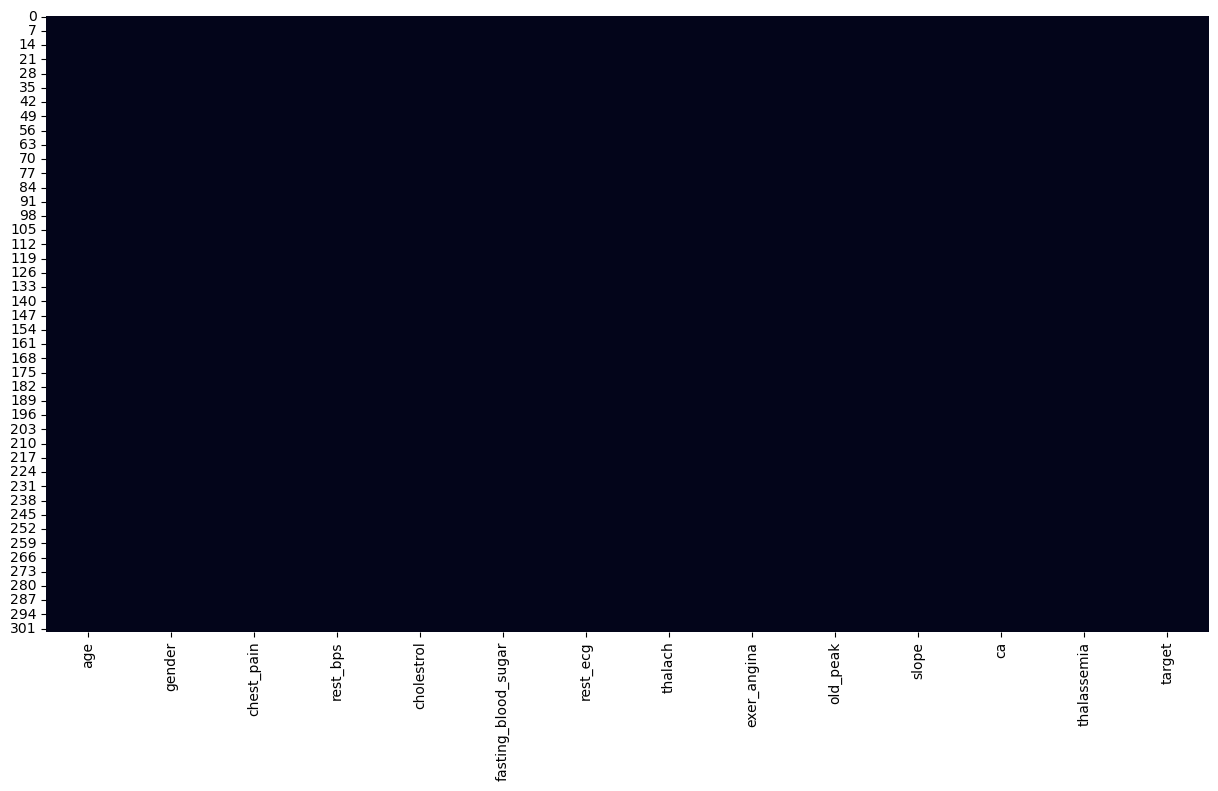

In [31]:
sns.heatmap(df_heart.isnull(),cbar=False)
plt.show()

In [32]:
categorical=[]
for column in df_heart:
    categorical.append(column)

In [33]:
df_cat=df_heart[categorical]

df_num=df_heart.drop(categorical, axis=1)

In [34]:
df_cat.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df_cat.shape

(303, 14)

In [36]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True,dtype=int)

In [37]:
df_cat_dummies.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [49]:
df_cat_dummies.shape

(303, 23)

In [38]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_heart_dummy = pd.concat([df_num, df_cat_dummies], axis=1)

# display first five observations of the dummy dataframe
df_heart_dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [39]:
# select only the target variable 'target' and store it in dataframe 'y'
y = pd.DataFrame(df_heart_dummy['target'],dtype=int)

In [40]:
# use 'drop()' to remove the variable 'target' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
X = df_heart_dummy.drop('target',axis = 1)


In [41]:
# check the first five observations of X
X.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [42]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))


In [43]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [44]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])
    
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [45]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')
    
    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [46]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card._append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [47]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (212, 22)
y_train (212, 1)
X_test (91, 22)
y_test (91, 1)


In [48]:
decision_tree  = DecisionTreeClassifier(criterion= "entropy", random_state=10)

decision_tree_model = decision_tree.fit(X_train, y_train)

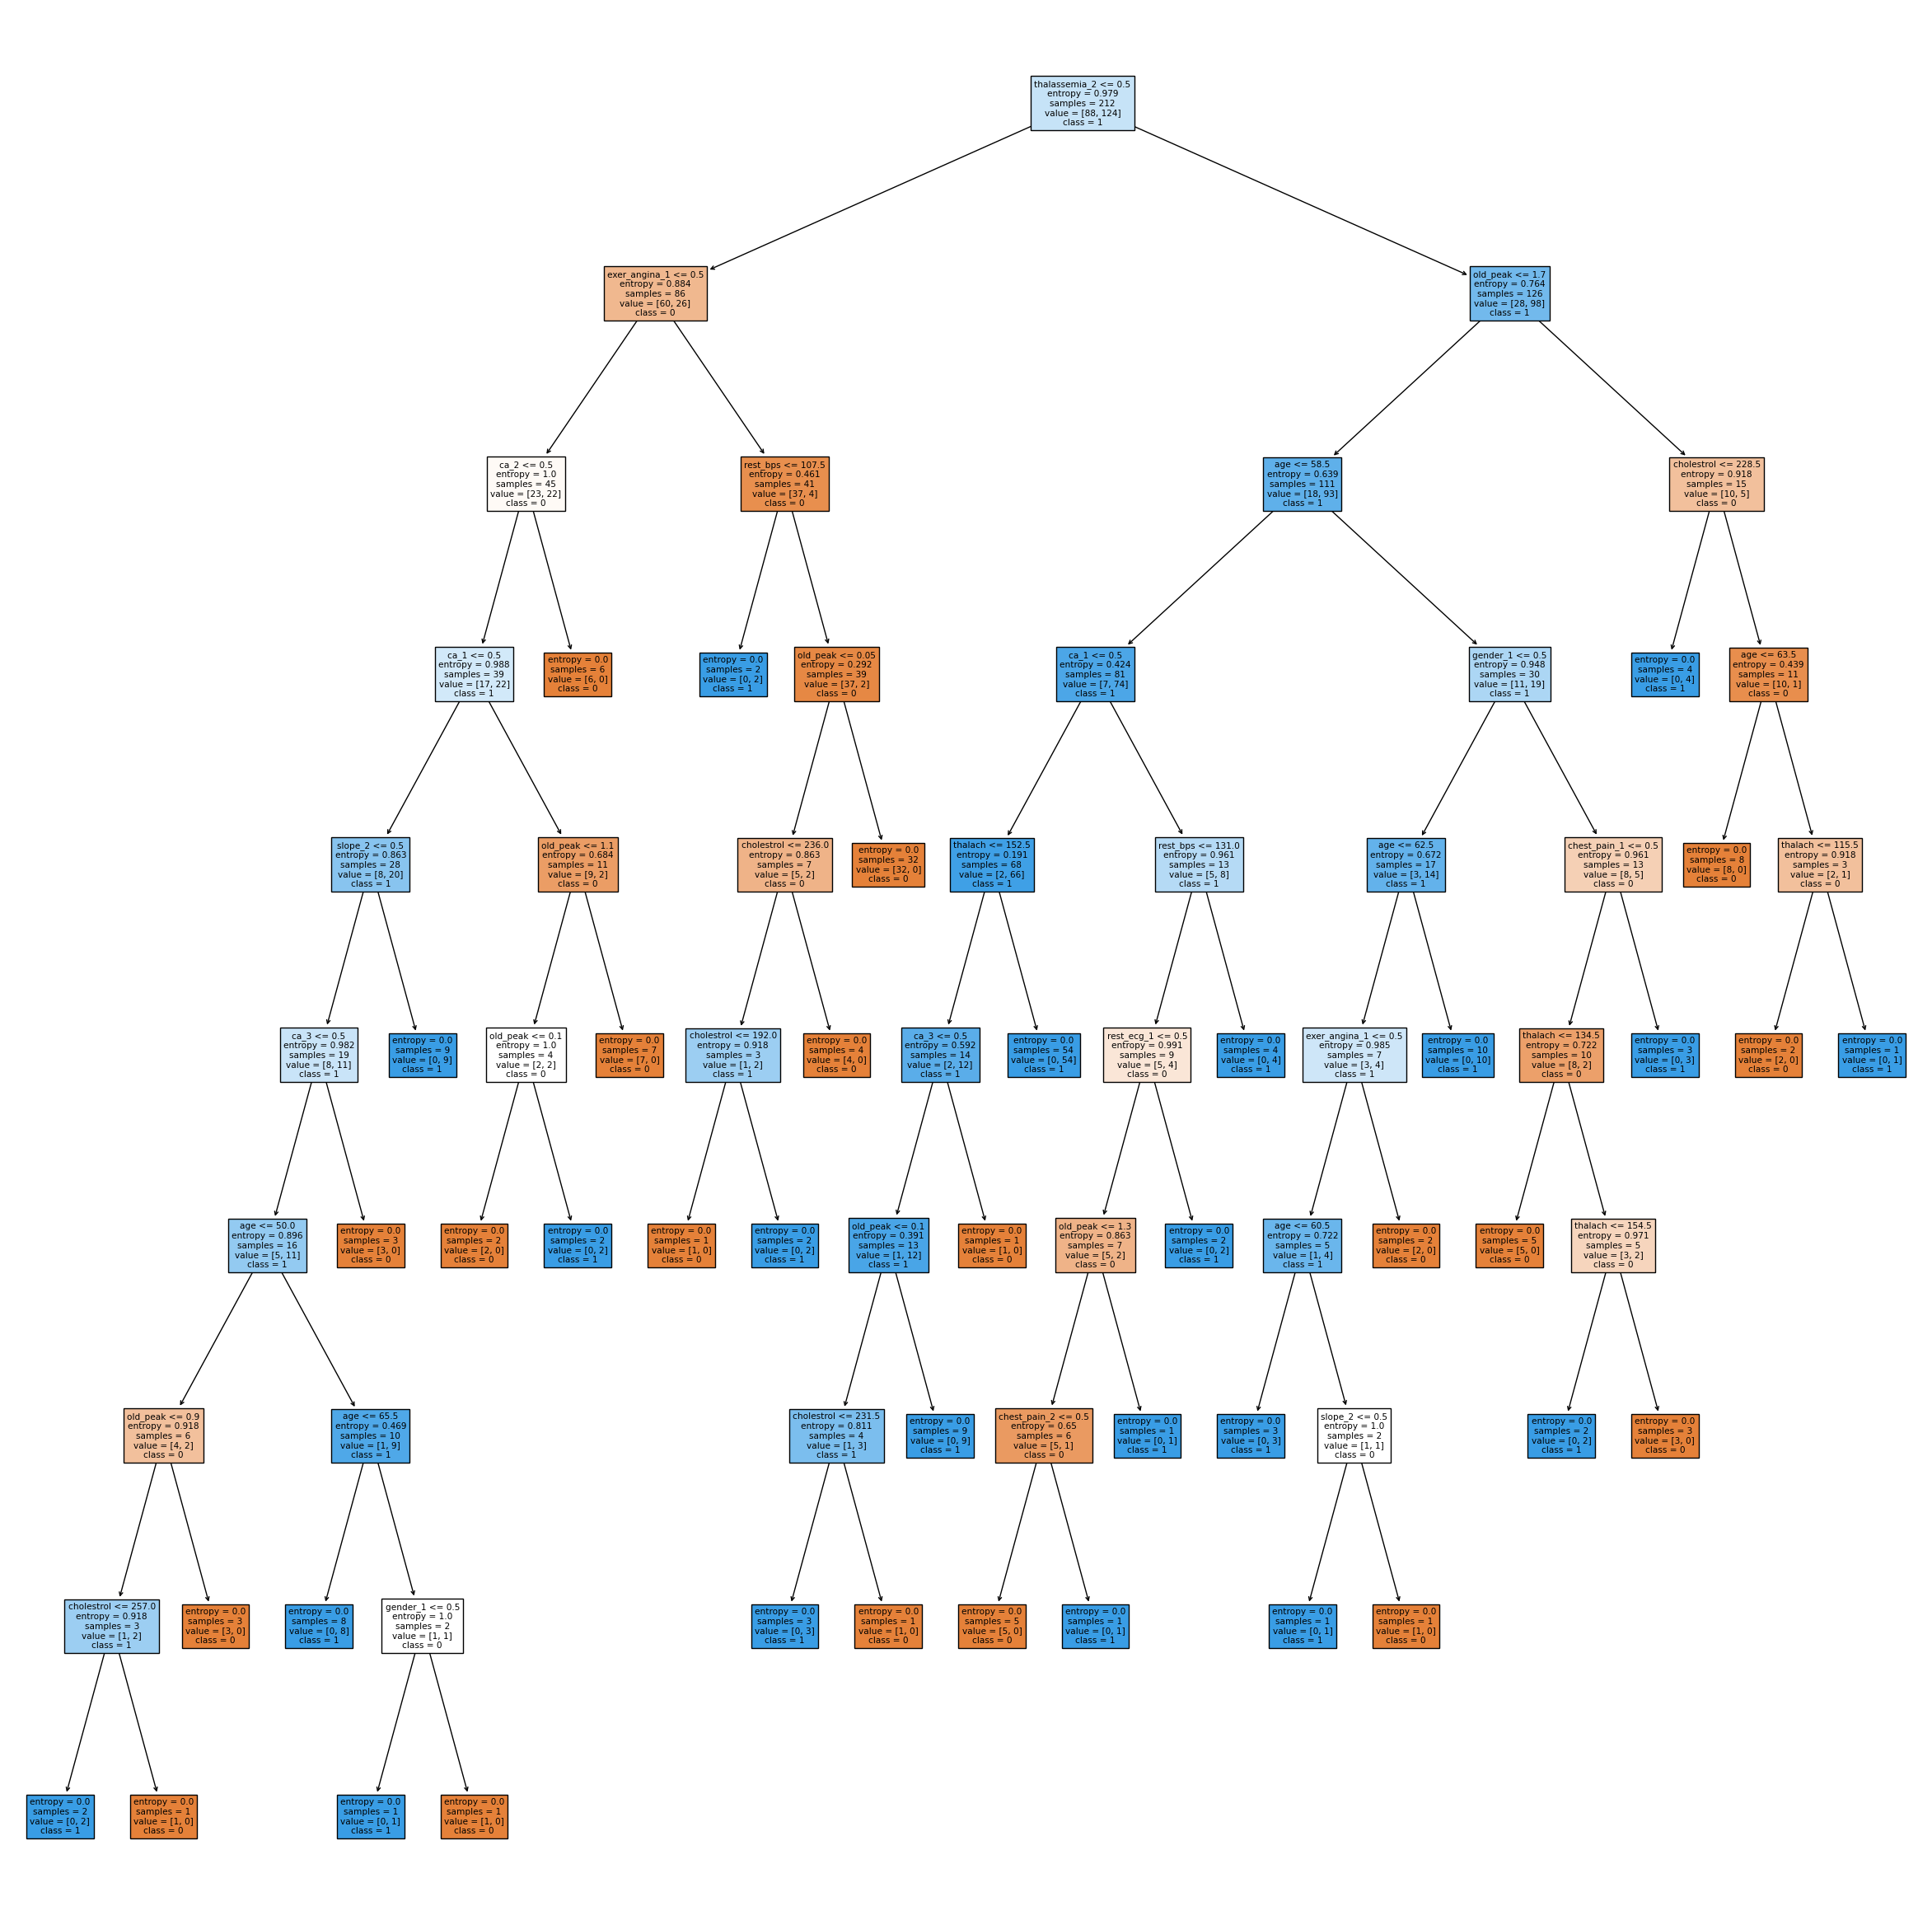

In [48]:
# This code is optional. so not in need for exam
# labels=list(X_train.columns)
labels=X_train.columns.tolist()

fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(decision_tree_model, feature_names=labels, class_names=["0","1"], filled=True)

In [74]:
# This code is optional. so not in need for exam
# This is to save this decision tree in some other place in system
dot_data=tree.export.graphviz(decision_tree_model, out_file="DT.dot",
                              feature_names=labels, class_names=["0","1"], filled=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph

AttributeError: module 'sklearn.tree' has no attribute 'export'

In [49]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0.])

In [50]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0])

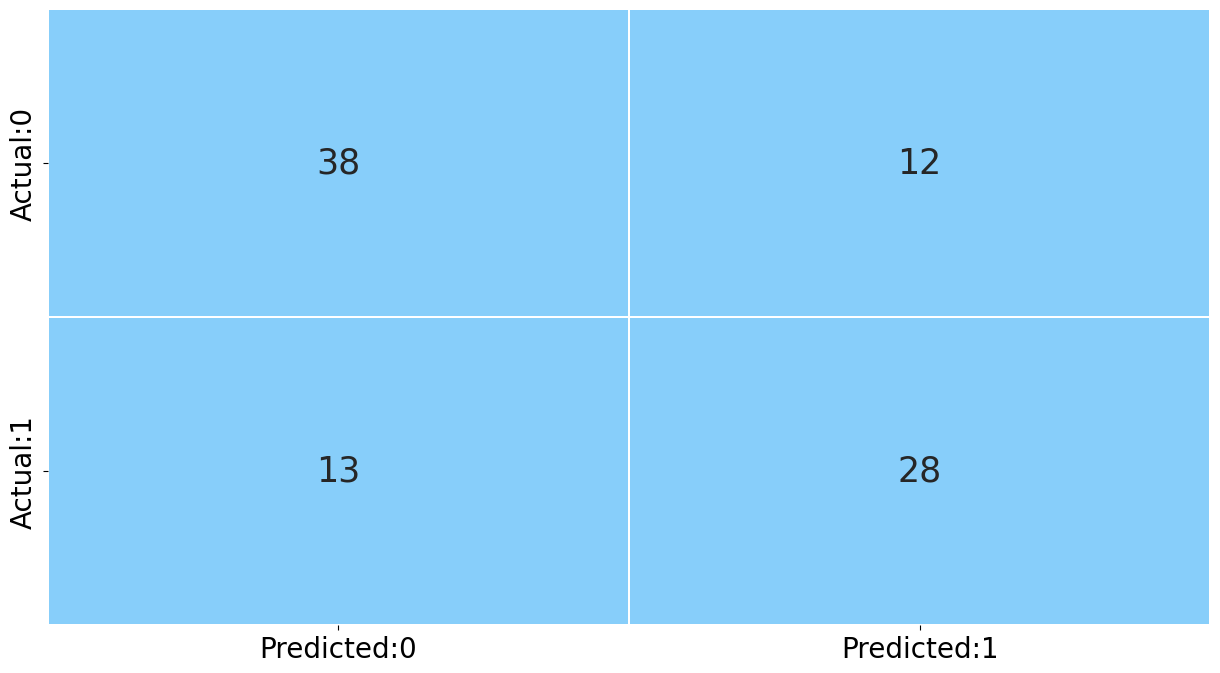

In [51]:
plot_confusion_matrix(decision_tree_model)

In [52]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree model to the function
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        50
           1       0.70      0.68      0.69        41

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



In [53]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree model to the function
kappa_value = kappa_score(decision_tree_model)

# print the kappa value
print(kappa_value)

0.4439012466389636


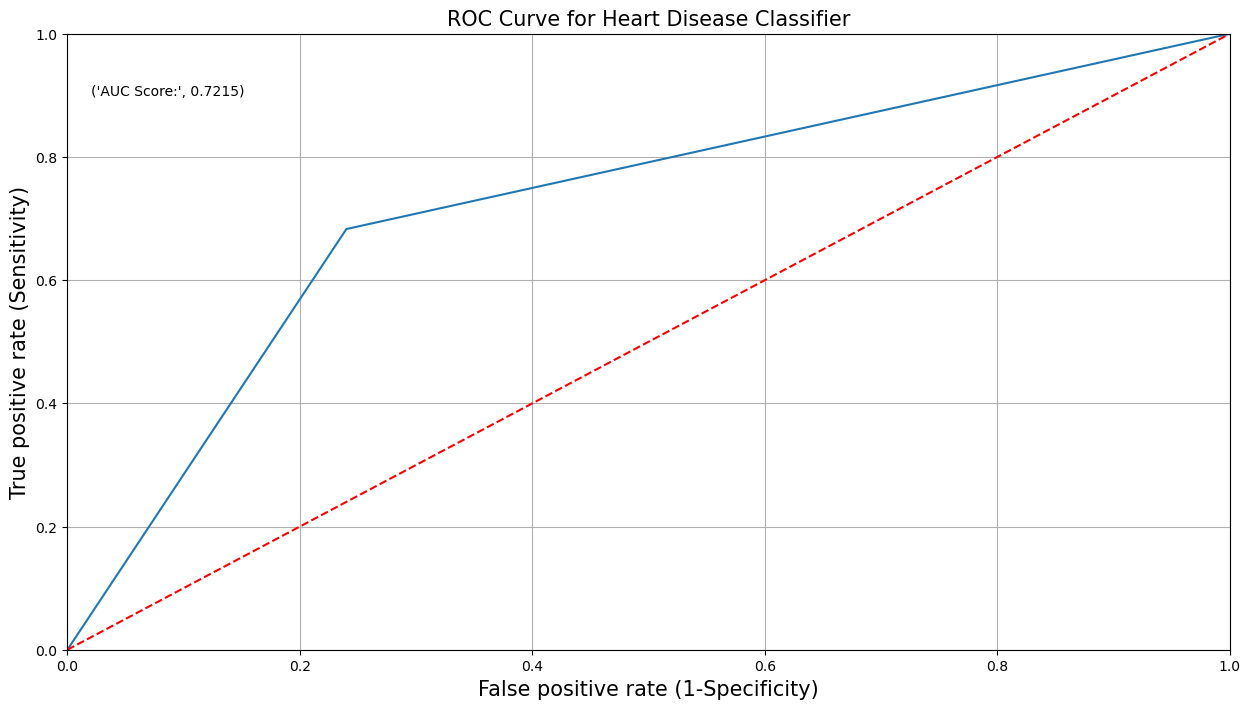

In [54]:
plot_roc(decision_tree_model)

In [55]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree' as model name to the function
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.721463,0.7,0.682927,0.725275,0.443901,0.691358
